# Маркетинговый анализ приложения Procrastinate Pro+ <a id="head"></a>

Развлекательное приложения Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.

**Задача:** разобраться в причинах спада прибыли и помочь компании выйти в плюс.

**Описание данных:**

`visits_info_short.csv` - хранит лог сервера с информацией о посещениях сайта:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

`orders_info_short.csv` - хранит информацию о заказах
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

`costs_info_short.csv` - хранит информацию о расходах на рекламу
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

<h4>Содержание:<span class="tocSkip"></span></h4>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Датафрейм-visits" data-toc-modified-id="Датафрейм-visits-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Датафрейм visits</a></span></li><li><span><a href="#Датафрейм-orders" data-toc-modified-id="Датафрейм-orders-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Датафрейм orders</a></span></li><li><span><a href="#Датафрейм-costs" data-toc-modified-id="Датафрейм-costs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Датафрейм costs</a></span></li></ul></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Профили-пользователей" data-toc-modified-id="Профили-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Профили пользователей</a></span></li><li><span><a href="#Страны-пользователей.-Страна-с-самым-большим-количеством-платящих-пользователей." data-toc-modified-id="Страны-пользователей.-Страна-с-самым-большим-количеством-платящих-пользователей.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Страны пользователей. Страна с самым большим количеством платящих пользователей.</a></span></li><li><span><a href="#Устройства-клиентов.-Устройства-предпочитающие-платящие-пользователи." data-toc-modified-id="Устройства-клиентов.-Устройства-предпочитающие-платящие-пользователи.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Устройства клиентов. Устройства предпочитающие платящие пользователи.</a></span></li><li><span><a href="#Рекламные-источники-привлечения.-Источники-с-большим-количеством-платящих-пользователей." data-toc-modified-id="Рекламные-источники-привлечения.-Источники-с-большим-количеством-платящих-пользователей.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Рекламные источники привлечения. Источники с большим количеством платящих пользователей.</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#Анализ-окупаемости-рекламы" data-toc-modified-id="Анализ-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ окупаемости рекламы</a></span></li><li><span><a href="#Конверсия-и-удержание-пользователей-и-динамика-их-изменений." data-toc-modified-id="Конверсия-и-удержание-пользователей-и-динамика-их-изменений.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Конверсия и удержание пользователей и динамика их изменений.</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам." data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по устройствам.</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам." data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам.</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам." data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по рекламным каналам.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загружаем данные о визитах, заказах и рекламных расходах
visits = pd.read_csv('datasets/visits_info_short.csv')
orders = pd.read_csv('datasets/orders_info_short.csv')
costs = pd.read_csv('datasets/costs_info_short.csv')

### Датафрейм visits

In [3]:
# выведем первые 5 строк датафрейма
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# изучим общую инофрмацию о таблице
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# подтвердим пропуски
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Пропусков в данных нет, переименнуем названия столбцов 

In [6]:
visits = visits.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end',
})

In [7]:
# проверим корректное переимнование
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Дата и время начала и окончания сессий приведём к типу `datetime` и проверим результат

In [8]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверим датафрейм на наличие дубликатов и не явных дубликатов

In [9]:
visits.duplicated().sum()

0

In [10]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [11]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [12]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Дубликатов и не явных дубликатов нет

### Датафрейм orders

In [13]:
# выведем первые 5 строк датафрейма
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [14]:
# изучим общую инофрмацию о таблице
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [15]:
# подтвердим отсутствие пропусков
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

Пропусков в данных нет. Переименнуем названия столбцов.

In [16]:
orders = orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'
})

In [17]:
# проверим корректное переимнование
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Дату и время покупки приведём к типу `datetime` и проверим результат

In [18]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим датафрейм на наличие явных дубликатов

In [19]:
orders.duplicated().sum()

0

Явных дубликатов нет. Проверять не явные нет необходимости, тк один пользователь мог совершить несколько заказов, сумма и время может совпадать.

### Датафрейм costs

In [20]:
# выведем первые 5 строк датафрейма
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [21]:
# изучим общую инофрмацию о таблице
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [22]:
# подтвердим отсутствие пропусков
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

Пропусков в данных нет. Переименнуем название столбца.

In [23]:
costs = costs.rename(columns={
    'Channel': 'channel'
})

In [24]:
# проверим корректное переимнование
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Дату проведения рекламной кампании приведём к типу `date`

In [25]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверим датафрейм на наличие явных дубликатов

In [26]:
costs.duplicated().sum()

0

Дубликатов нет, проверим не явные дубликаты

In [27]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дубликатов и не явных дубликатов нет

Вывод: Загрузили датасеты. Привели к змеиному регистру, изменили данные к верному типу. Дубликотов и не явных дубликатов нет.


## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [28]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [29]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [30]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [31]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw, 
        result_grouped,  
        result_in_time,  
        roi_grouped,  
        roi_in_time, 
    ) 

функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()

In [32]:
# функция для сглаживания фрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [34]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [35]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Профили пользователей

In [36]:
# создадим профиль пользователя
profiles=get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Определим минимальную дату привлечения пользователей.

In [37]:
profiles['first_ts'].dt.date.min()

datetime.date(2019, 5, 1)

Определим максимальную дату привлечения пользователей.  В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, значит горизонт анализа зададим равное 14дням. Данные о пользователях предоставлены, которые были привлечены по 27 октября 2019 года.

In [38]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
# создаём опцию «игнорировать горизонт»
ignore_horizon=False

max_analysis_date =  observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

datetime.date(2019, 10, 19)

Создали профили пользователей. Данные предоставлены с 1ого мая, и в первый же день был привлечён пользователь. Последнийдений день 14 октября.

### Страны пользователей. Страна с самым большим количеством платящих пользователей. 

In [39]:
region_count = profiles.groupby('region')['user_id'].count().sort_values(ascending=False)
region_count

region
United States    100002
UK                17575
France            17450
Germany           14981
Name: user_id, dtype: int64

Видим, что больше всего пользователей приходят из США, меньше всего из Германии. Из Великобритании и Франции примерно одинаковое количество.

In [40]:
region_count_payer = profiles.groupby(['region', 'payer']).agg({'user_id': 'count'})
region_count_payer['percent'] = region_count_payer['user_id'] / region_count * 100
region_count_payer

user_id    percent
region        payer                    
France        False    16787  96.200573
              True       663   3.799427
Germany       False    14365  95.888125
              True       616   4.111875
UK            False    16875  96.017070
              True       700   3.982930
United States False    93100  93.098138
              True      6902   6.901862

В США большое всего платящих пользователей - 6,9%. Во Франции почти в 2 раза меньше - 3,8%. Пользователей из Германии меньше всего, но процент платящих занимает второе место - 4,1%.

### Устройства клиентов. Устройства предпочитающие платящие пользователи.

In [41]:
device_count = profiles.groupby('device')['user_id'].count().sort_values(ascending=False)
device_count

device
iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: user_id, dtype: int64

Видим, что больше всего пользователей пользуются iPhone. Меньше всего Mac.

In [42]:
device_count_payer = profiles.groupby(['device', 'payer']).agg({'user_id': 'count'})
device_count_payer['percent'] = device_count_payer['user_id'] / device_count * 100
device_count_payer

user_id    percent
device  payer                    
Android False    32982  94.148207
        True      2050   5.851793
Mac     False    28130  93.635577
        True      1912   6.364423
PC      False    28918  94.953210
        True      1537   5.046790
iPhone  False    51097  93.792103
        True      3382   6.207897

Не смотря на то, что пользователей, которые используются устройставми Mac, меньше всего, процент платящих пользователей самый большой 6,4%. На втором месте iPhone 6,2%. Меньше всего показатель у пользователей с утройством PC.

### Рекламные источники привлечения. Источники с большим количеством платящих пользователей.

In [43]:
channel_count = profiles.groupby('channel')['user_id'].count().sort_values(ascending=False)
channel_count

channel
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: user_id, dtype: int64

Видим, что больше всего пользователей пришли самостоятельно. Самый большой источник привлечения FaceBoom, самый малый lambdaMediaAds

In [44]:
channel_count_payer = profiles.groupby(['channel', 'payer']).agg({'user_id': 'count'})
channel_count_payer['percent'] = channel_count_payer['user_id'] / channel_count * 100
channel_count_payer

user_id    percent
channel            payer                    
AdNonSense         False     3440  88.659794
                   True       440  11.340206
FaceBoom           False    25587  87.795086
                   True      3557  12.204914
LeapBob            False     8291  96.936747
                   True       262   3.063253
MediaTornado       False     4208  96.425298
                   True       156   3.574702
OppleCreativeMedia False     8372  97.292272
                   True       233   2.707728
RocketSuperAds     False     4096  92.086331
                   True       352   7.913669
TipTop             False    17683  90.399264
                   True      1878   9.600736
WahooNetBanner     False     8100  94.703613
                   True       453   5.296387
YRabbit            False     4147  96.173469
                   True       165   3.826531
lambdaMediaAds     False     1924  89.530014
                   True       225  10.469986
organic            False    55279  97.944684
                   True      1160   2.055316

FaceBoom явлется самым лучшим источников привлечения плательщих клиентов 12,2%. Затем идёт AdNonSense 11,3%. Меньше всего платящих клиентов привлекла OppleCreativeMedia 2,7%

Вывод: Данные предоставлены с 1ого мая, и в первый же день был привлечён пользователь.
В США большое всего платящих пользователей. Пользователей из Германии меньше всего, но процент платящих занимает второе место. Пользователей пользующихся утройством Mac процент платящих пользователей самый большой, не смотя на то, что таких пользователей меньше всего, на втором месте iPhone, с самым большим кол-вом устройств. 
FaceBoom явлется самым лучшим источников привлечения плательщих клиентов. Затем идёт AdNonSense.

## Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [45]:
costs['costs'].sum()

105497.30000000002

Выясним, как траты распределены по рекламным источникам.

In [46]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [47]:
# добавим информацию с неделями и месяцами
cost=costs
cost['dt'] = pd.to_datetime(cost['dt'])
cost['week']=cost['dt'].dt.isocalendar().week
cost['month']=cost['dt'].dt.month

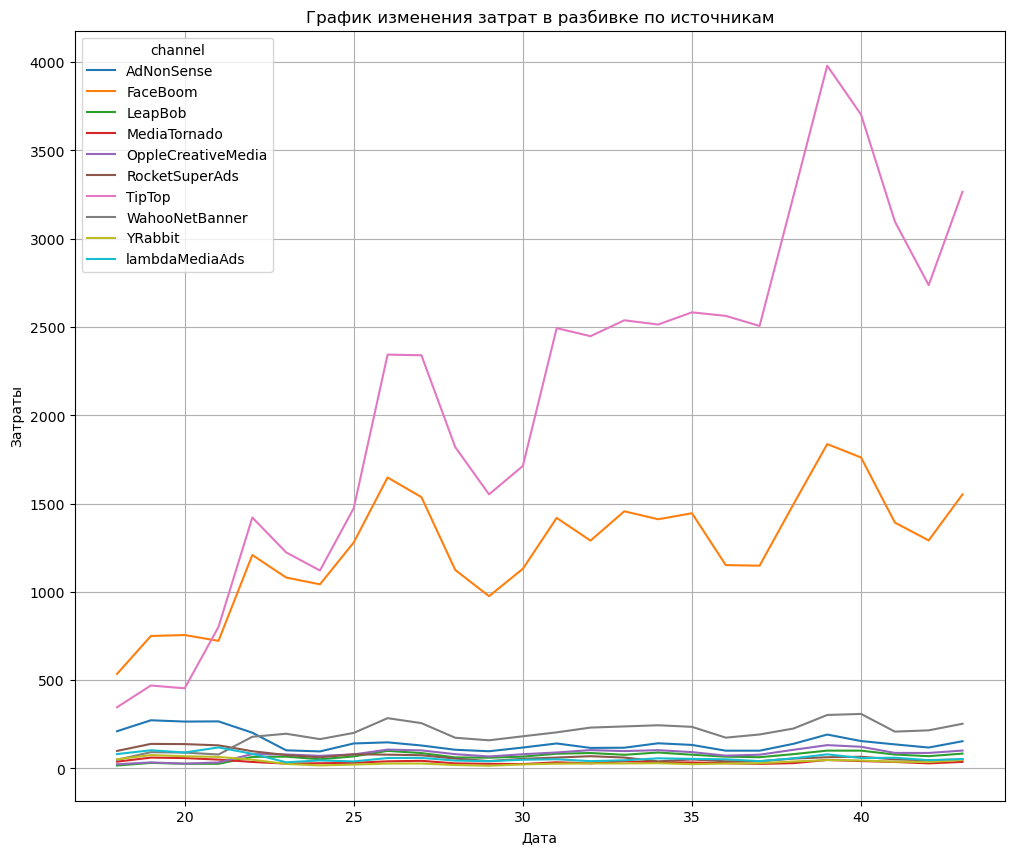

In [48]:
# по неделям
(cost
    .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(figsize=(12, 10), grid=True,)
)
plt.title('График изменения затрат в разбивке по источникам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

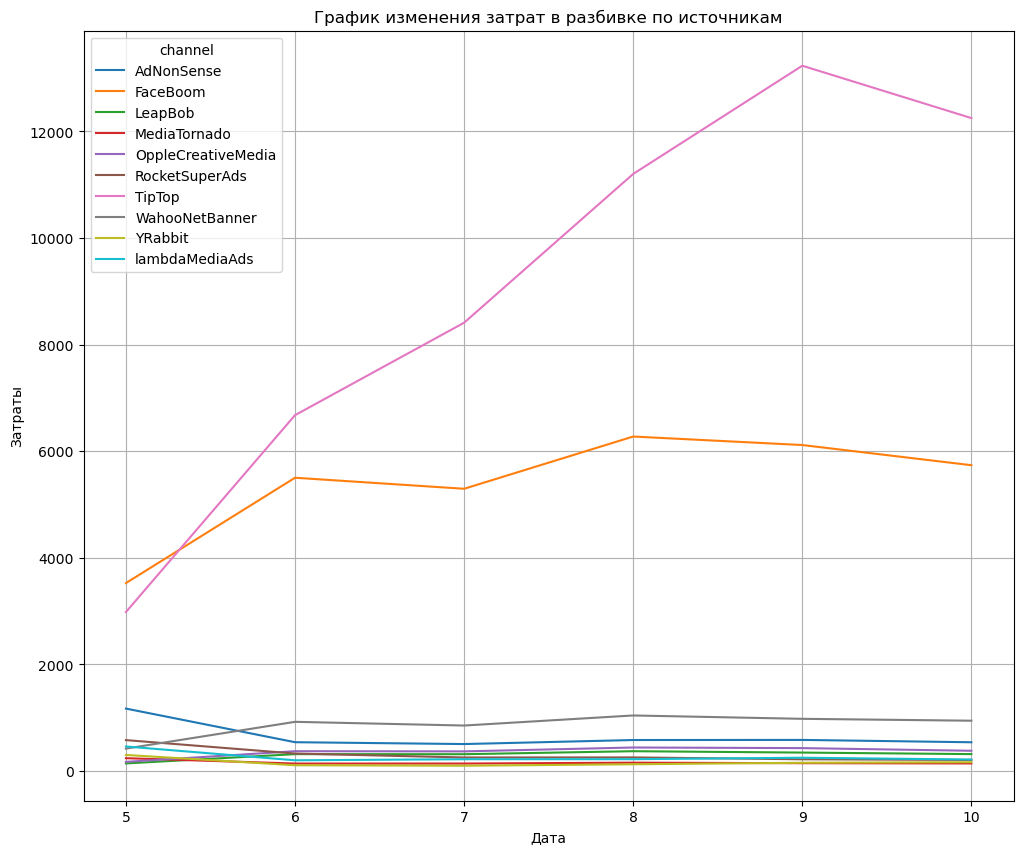

In [49]:
# по месяцам
(cost
    .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(figsize=(12, 10), grid=True,)
)
plt.title('График изменения затрат в разбивке по источникам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

На рекламного источника TipTop было больше всего вложений, за ним идёт FaceBoom. На остальные источники сумма затрат, примерно,  на однном уровне.

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. 

In [50]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

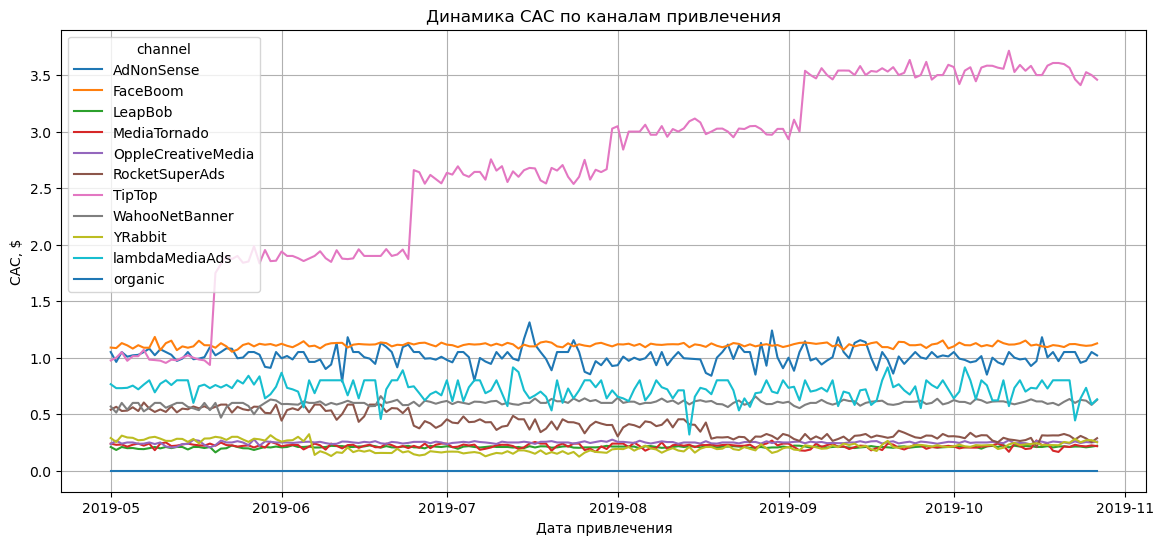

In [51]:
# строим график истории изменений CAC по каналам привлечения
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(14, 6))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Вывод: В рекламном источнике TipTop средняя стоимость привлечения одного пользователя самая большая 2.8 и с каждым месяцем росла, но, как узнали ранее, приносила всего 9,6% платящих пользователей. Стоит обратить внимание на источники FaceBoom и AdNonSense, которые приносят больше платящих клиентов и являются более стабильными в стоимости привлечения клиента 1.1 и 1.0 соответсвенно.

## Окупаемость рекламы

Для дальнейшего анализа уберём клиентов пришедших самостоятельно.

In [52]:
profiles = profiles.query('channel != "organic"')

### Анализ окупаемости рекламы

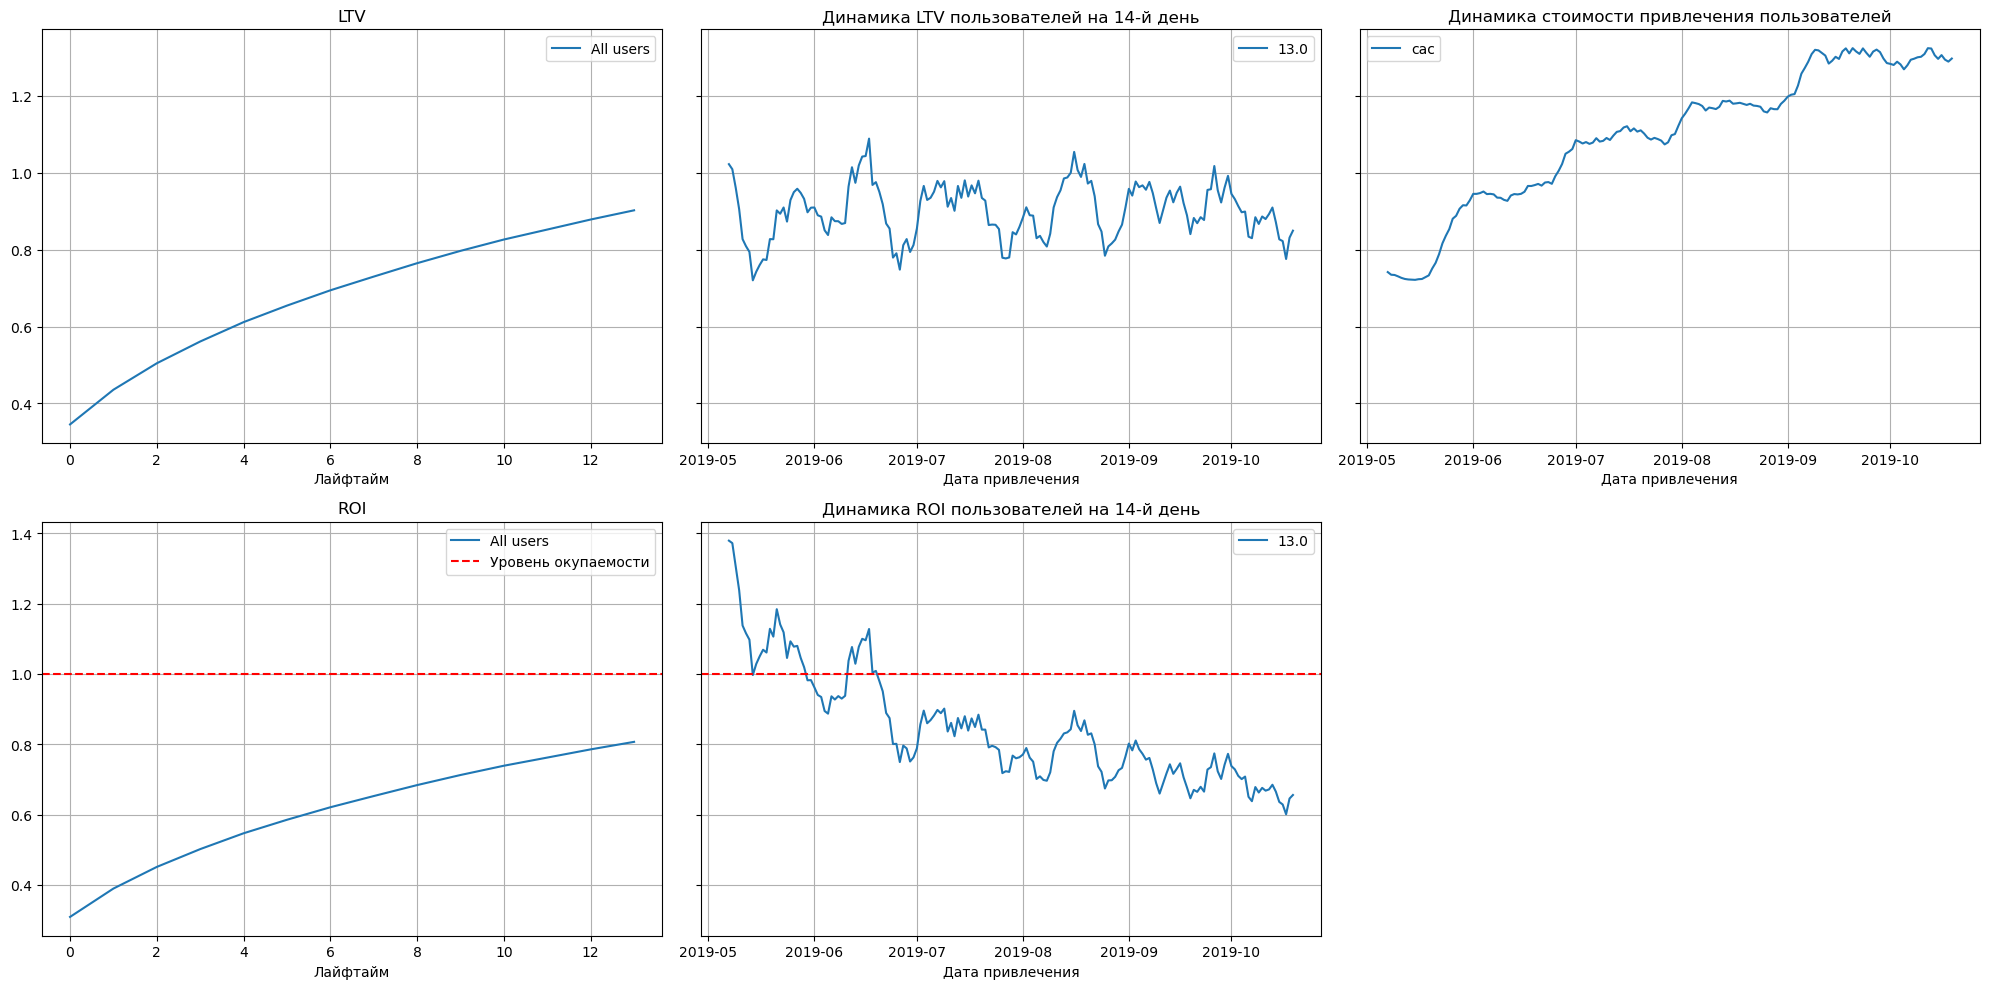

In [53]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод: LTV достаточно стабилен. Реклама не окупается. ROI падает, так как растёт привлечение.

### Конверсия и удержание пользователей и динамика их изменений.

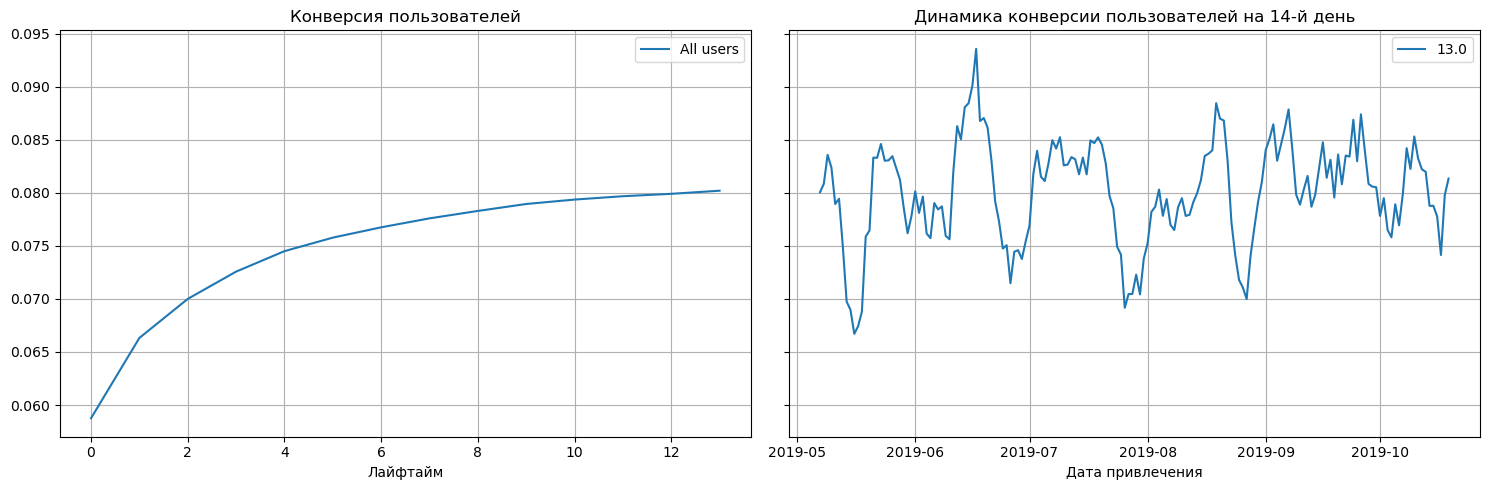

In [54]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days#, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


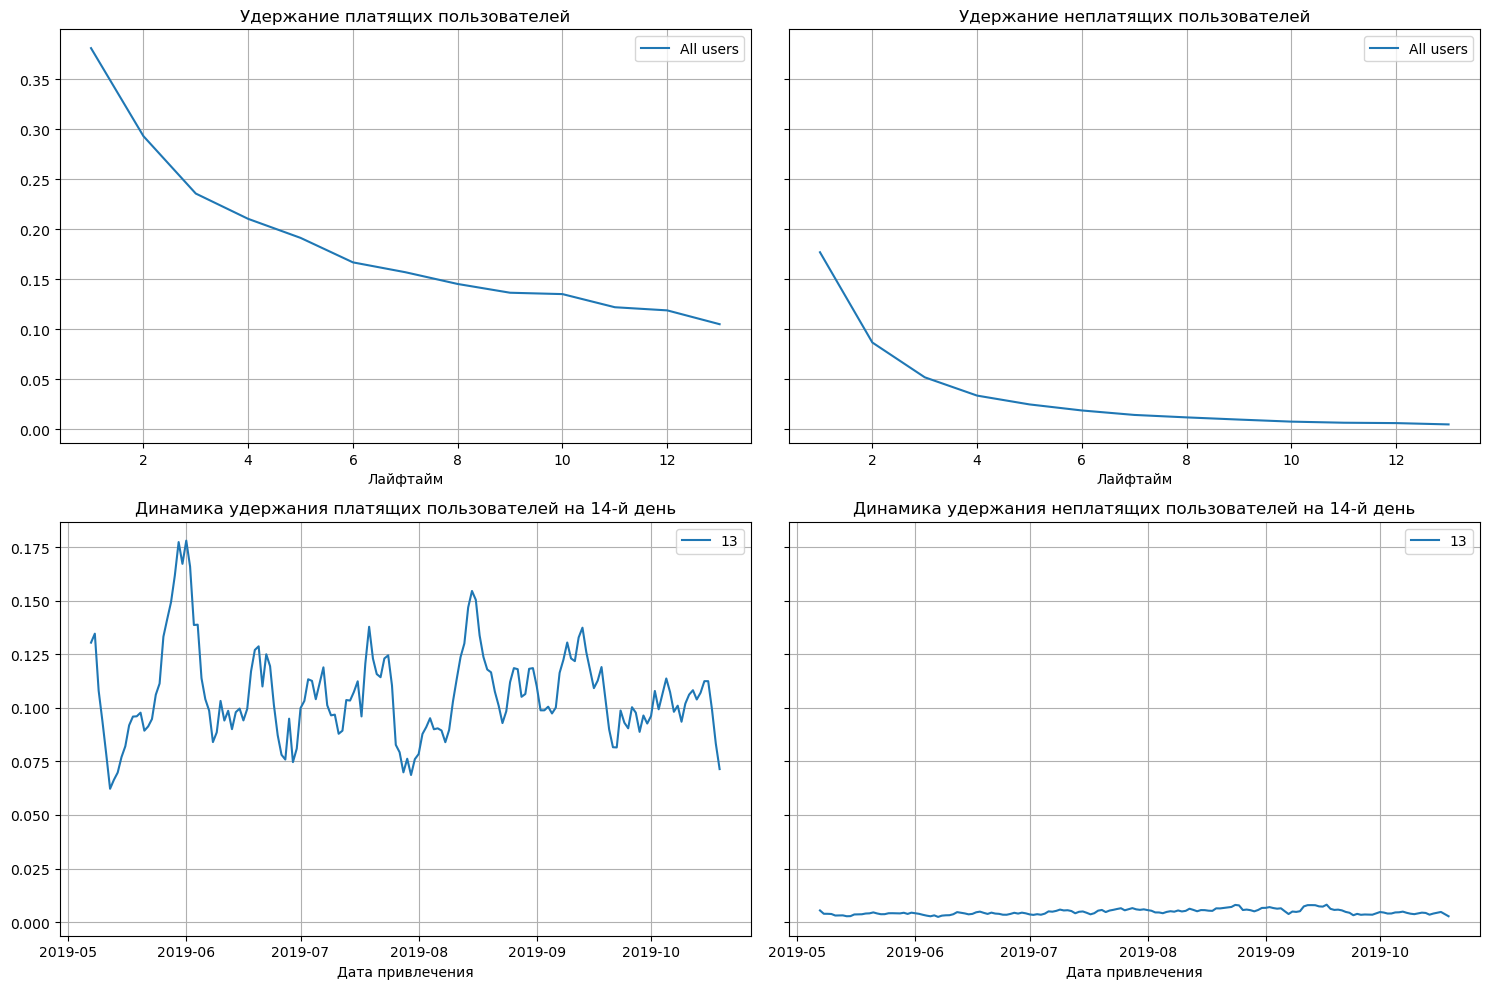

In [55]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самые "качественные" пользователи из большенства каналов были привлечены примерно в конце мая.

### Анализ окупаемости рекламы с разбивкой по устройствам. 

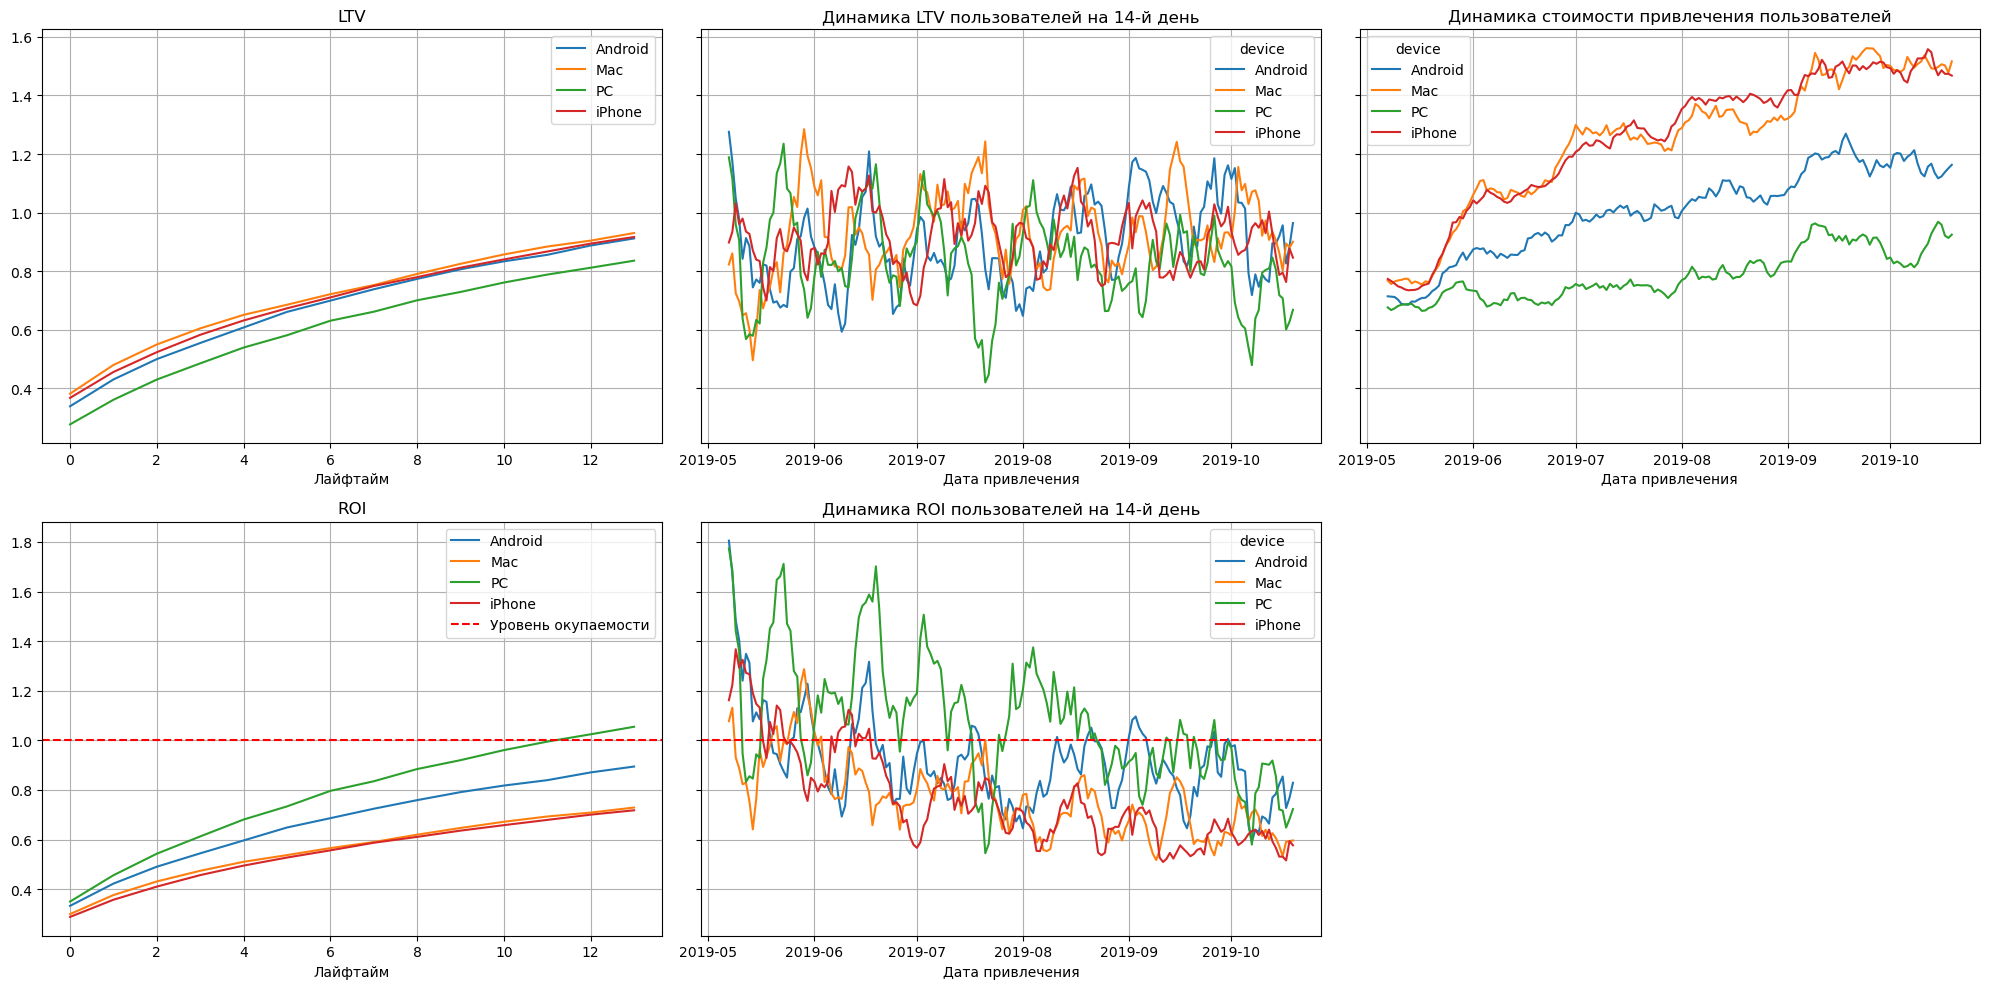

In [56]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Стоимость привлечения пользователя растёт, но только с клиенты с утройством PC окупаются. Iphone и Mac процент окупаемости менее 80%, стоит расмотреть интерфейс и работу приложения на данных устройствах и стоит помнить, что основная масса пользователей США использует технику apple.

### Анализ окупаемости рекламы с разбивкой по странам. 

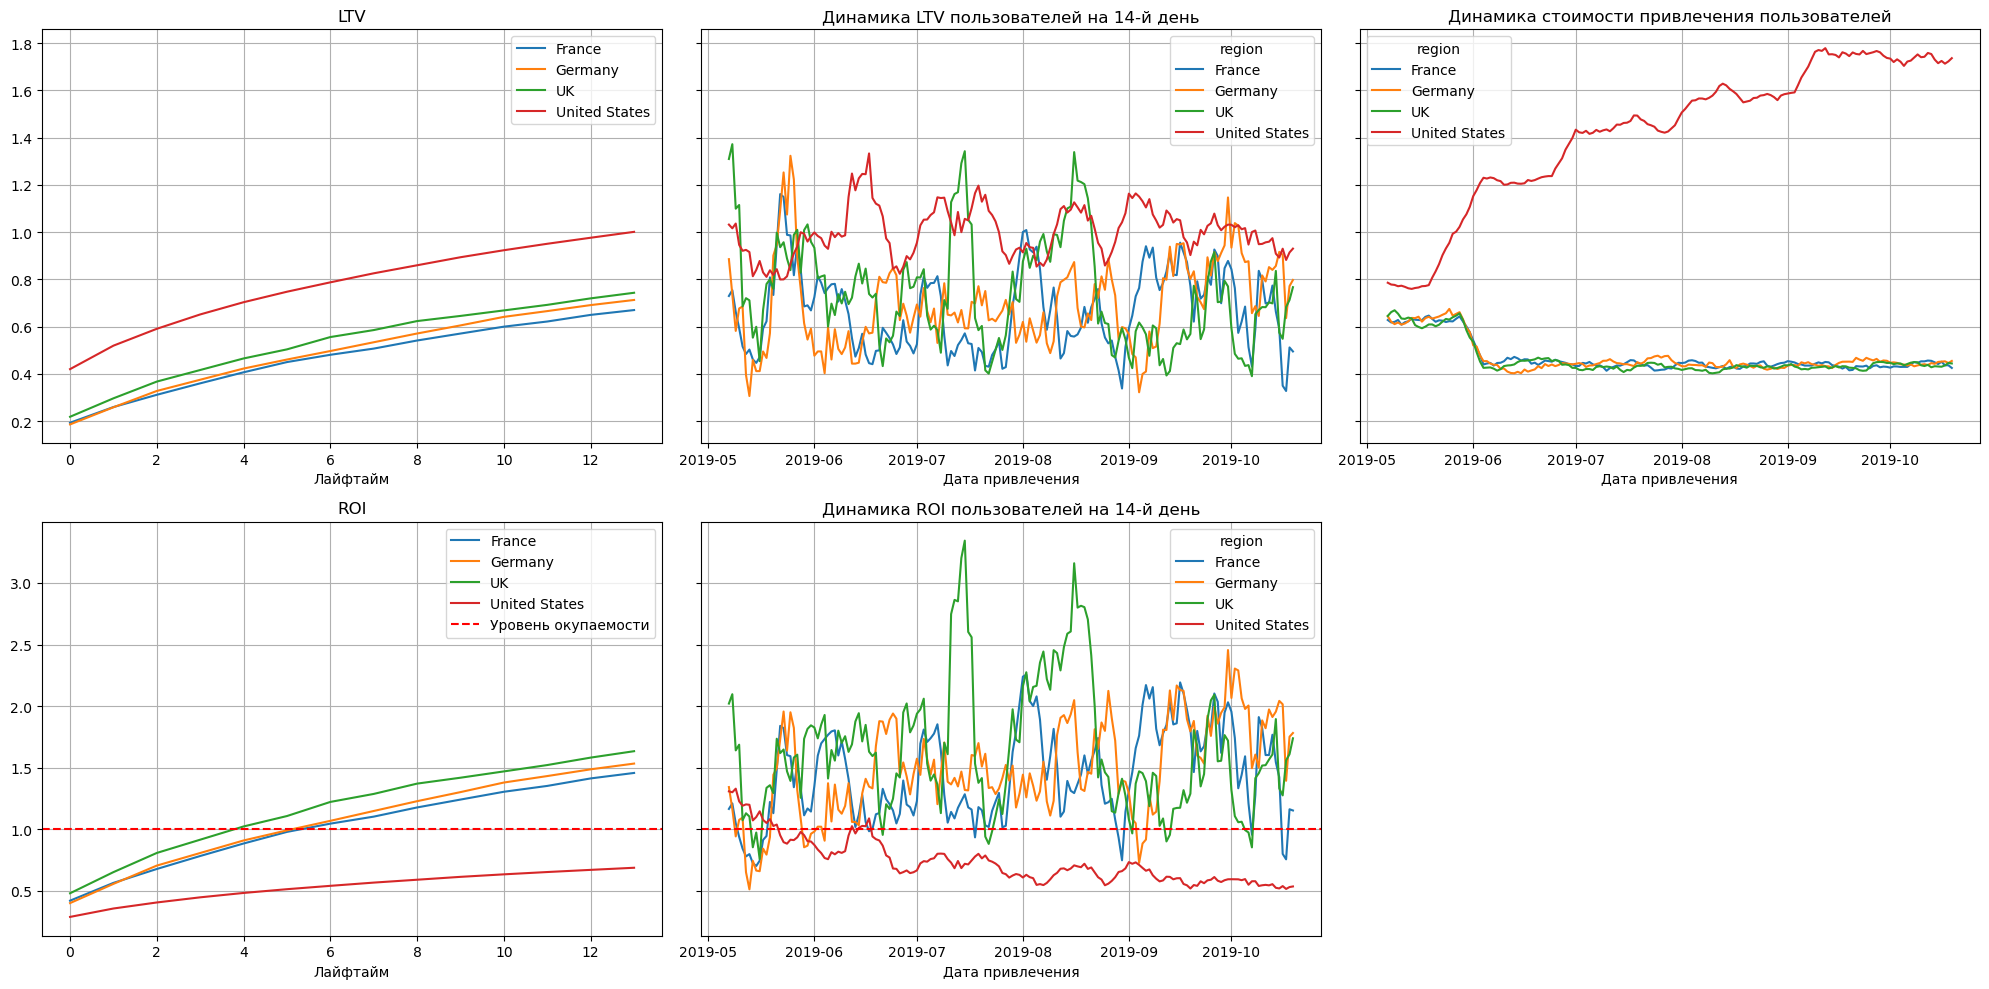

In [57]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Графики LVT примерно на одном уровне, кроме United States. В этой стране реклама не окупается, и стоимоть привлечения клиентов растёт.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам. 

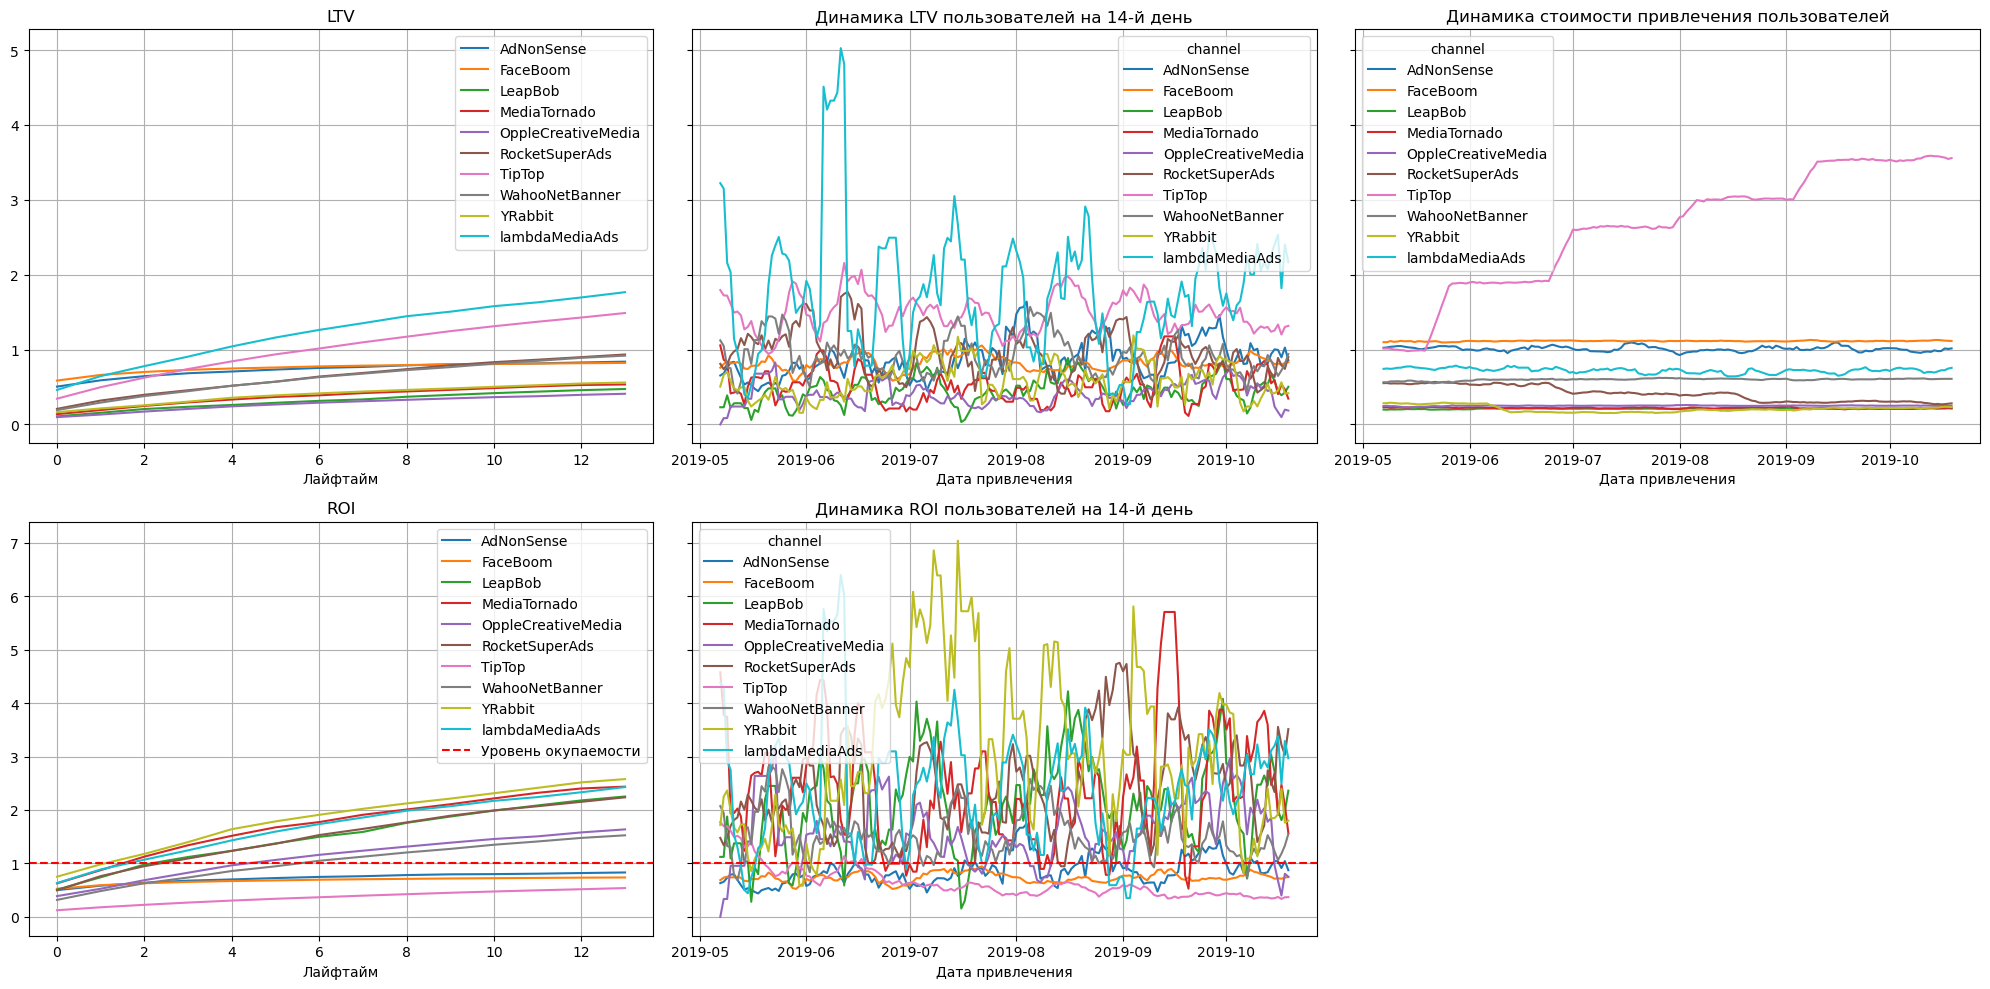

In [58]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Рекламные каналы окупаются, за исключением AdNonSense, FaceBoom, TipTop. Только стоимоть привлечения в TipTop растёт, на остальных каналах остаёт примерно на одном уровне.

Вывод: Из стран USA снижает окупаемость рекламы. Из каналов: AdNonSense, FaceBoom, OppleCreativeMedia. Хуже всего удерживаются платящие пользователи устройств IPhone и Mac
Проблемы с окупаемостью могут быть вызваны неправильным распределением средств на привлечение с каналов и не корректой работой приложением. Стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего

## Выводы

Больше всего пользователей и  платящих пользователей приходят из США, но в этой стране реклама не окупается и стоимоть привлечения клиентов растёт. В США больше всего пользователей пользуются iPhone и Mac и процент платящих пользоватеамый большой, но стоимость клиентов так же не окупается. Стоит обратить внимание на данных пользователей, возможно,стоит расмотреть интерфейс и корректную работу приложения на данных устройствах.
Пользователей из Германии меньше всего, но процент платящих занимает второе место. И реклама во всех сранах кроме США окупается. Клиенты с утройством PC окупаются, удерживаются хорошо, но процент платящих клиентов самый маленький. Нужно обратить внимание на саму рекламу.

Самый большой источник привлечения FaceBoom, TipTop, OppleCreativeMedia, LeapBob, WahooNetBanner. FaceBoom явлется самым лучшим источников привлечения плательщих клиентов, но он не окупается, так же как AdNonSense, TipTop.  Стоит обратить внимание на каналы RocketSuperAds, lambdaMediaAds, новых клиентов меньше, но больше процент платящих клиентов и реклама окупается. А так же YRabbit, MediaTornado, LeapBob.

Рекомендации для отдела маркетинга: 
- Стоит привлекать клиентов из других стран, у которых так же большой процет платящих клиентов.
- Больше обратить внимание на каналы привлечения ocketSuperAds и lambdaMediaAds, которые присосят большой процент платящих клиентов.
- Уменьшить зартраты на канал TipTop.
- Обратить внимание на рекламу клиентов с утройством PC.

Также можно повысить удержание для пользователей из США, например с помощью введения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Для канала FaceBoom можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками. Также, можно ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале.

[Начало](#head)